In [10]:
import geopandas as gpd
import pandas as pd

# Load Köppen climate zones shapefile
koppen_gdf = gpd.read_file("data/African_Koppen.shp")

# Load your stations CSV
stations_df = pd.read_csv("data/ADHI_stations.csv")
stations_gdf = gpd.GeoDataFrame(
    stations_df,
    geometry=gpd.points_from_xy(stations_df.Longitude, stations_df.Latitude),
    crs="EPSG:4326"  # Make sure coordinate system matches
)

# Spatial join to get the climate zone of each station
if koppen_gdf.crs is None:
    koppen_gdf.set_crs("EPSG:4326", inplace=True)
joined = gpd.sjoin(stations_gdf, koppen_gdf, how="left", predicate="intersects")

print("Köppen columns:", koppen_gdf.columns)
print(joined.columns)  

joined[['ID_left', 'Country', 'Latitude', 'Longitude', 'geometry', 'GRIDCODE']].rename(
    columns={'ID_left': 'ID', 'GRIDCODE': 'Koppen'}
).to_csv("station_region_map_climate.csv", index=False)


Köppen columns: Index(['ID', 'GRIDCODE', 'geometry'], dtype='object')
Index(['ID_left', 'Station_co', 'Name', 'Data_sourc', 'Catchment',
       'Mean_altit', 'Maximum_al', 'Minimum_al', 'Mean_annual_precip',
       'Mean_annual_pet', 'Mean_annual_temp', 'lc_forest', 'lc_urban',
       'lc_crop', 'lc_crop_irrig', 'lc_grass', 'lc_shrub', 'lc_sparse',
       'lc_bare', 'Starting_y', 'Ending_yea', 'Number_dams', 'Country',
       'Longitude', 'Latitude', 'Flag', 'Comment', 'geometry', 'index_right',
       'ID_right', 'GRIDCODE'],
      dtype='object')


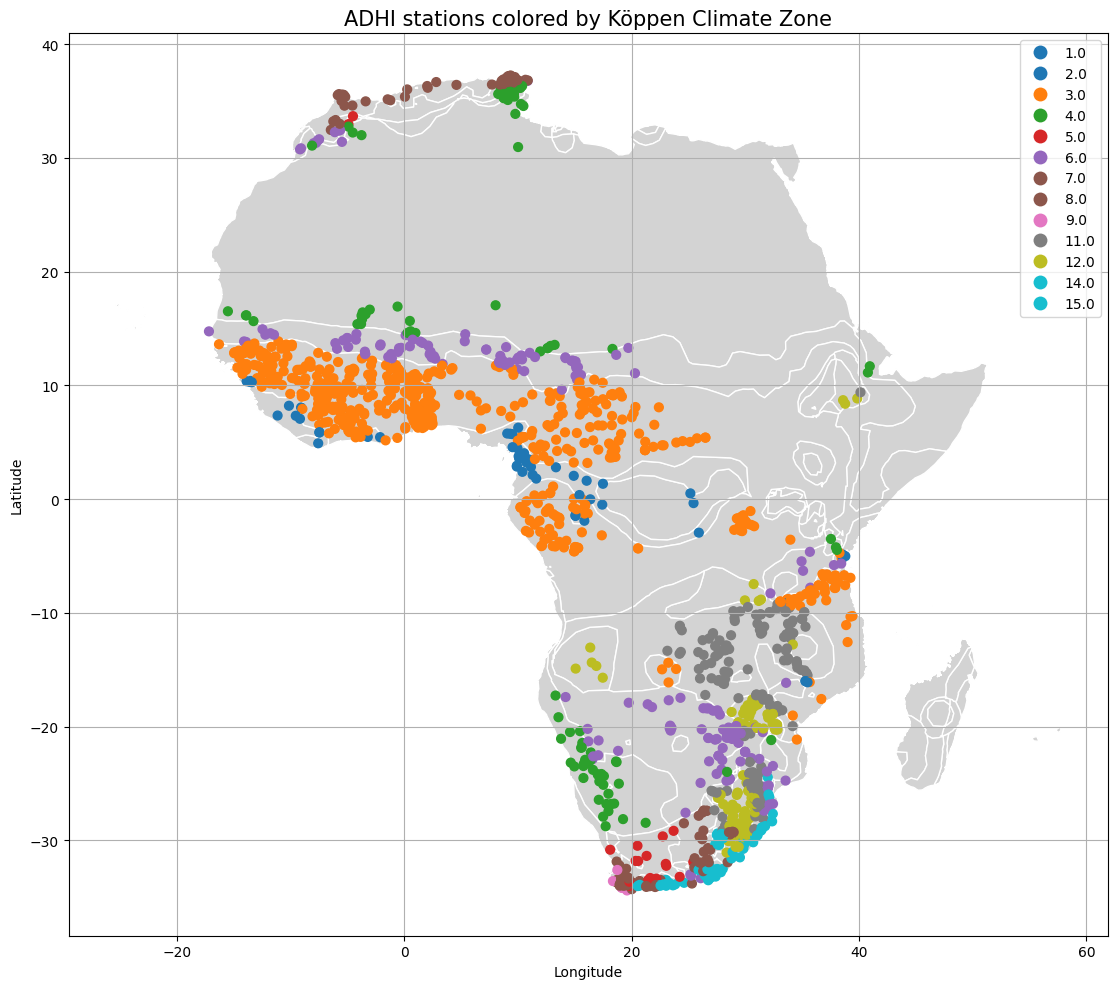

In [12]:
import matplotlib.pyplot as plt

# Load Köppen polygons
koppen = gpd.read_file("data/African_Koppen.shp")

# Set CRS if missing
if koppen.crs is None:
    koppen.set_crs("EPSG:4326", inplace=True)

# Load station-region-climate map
stations = pd.read_csv("station_region_map_climate.csv")
stations_gdf = gpd.GeoDataFrame(
    stations,
    geometry=gpd.points_from_xy(stations.Longitude, stations.Latitude),
    crs="EPSG:4326"
)

fig, ax = plt.subplots(figsize=(12, 10))
koppen.plot(ax=ax, color='lightgray', edgecolor='white')

# Assign color per climate zone
climate_categories = stations["Koppen"].astype("category")
stations_gdf.plot(
    ax=ax,
    column=climate_categories,
    legend=True,
    markersize=40
)

plt.title("ADHI stations colored by Köppen Climate Zone", fontsize=15)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()